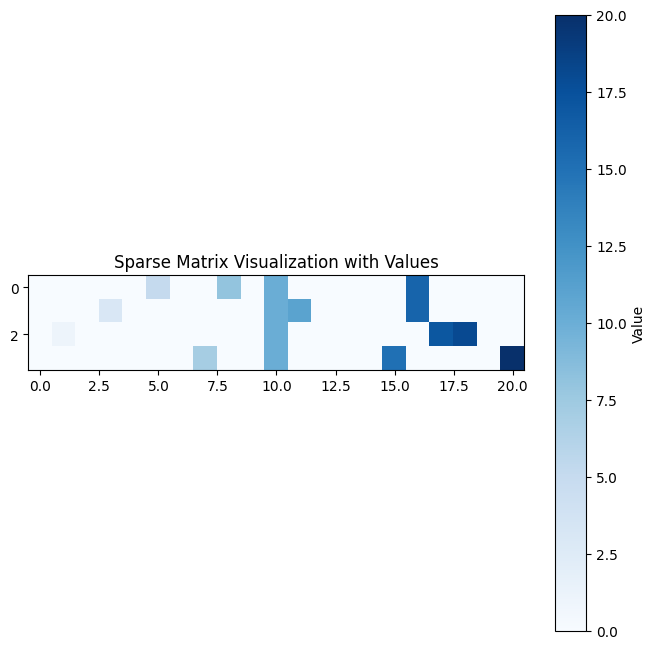

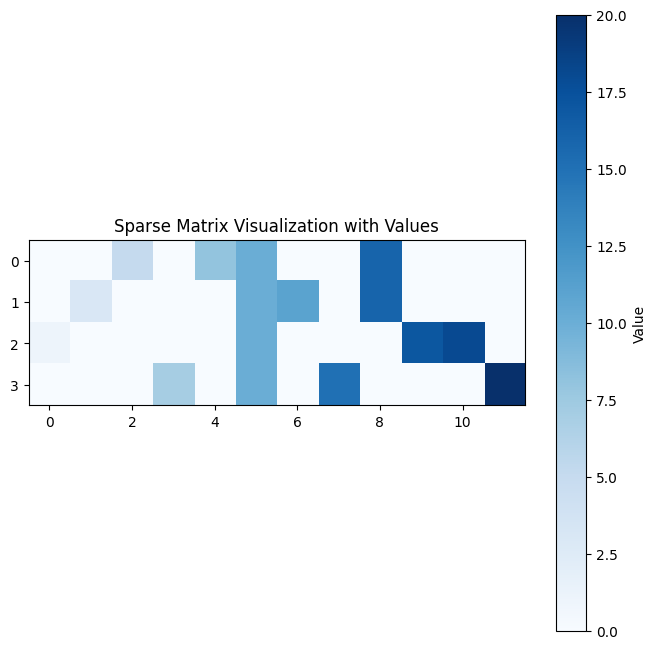

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SparseAlignDemo:
    def __init__(self):
        self.a = 0
	
    def plot_dense_matrix(self, dense_matrix, verbose=True):
        plt.figure(figsize=(8, 8))
        
        # 转换为稀疏矩阵的二维数组表示
        # matrix_dense = sparse_matrix.toarray()
        # zero_mask = (matrix_dense == 0)
        
        plt.imshow(dense_matrix, cmap="Blues", alpha=1)
        
        # 在非零元素处标记其值，保留一位小数
        for i in range(dense_matrix.shape[0]):
            for j in range(dense_matrix.shape[1]):
                if dense_matrix[i, j] != 0:
                    if (verbose):
                        plt.text(j, i, f'{dense_matrix[i, j]:.1f}', ha='center', va='center', color='black')
        
        plt.colorbar(label="Value")
        plt.title("Sparse Matrix Visualization with Values")
        plt.show()
        
    def one_dim_align(self, sparse_matrix, matrix_row, matrix_col):
		# 将稀疏矩阵转换为密集矩阵以便操作
        rows, cols = sparse_matrix.shape

        # one_dim_align 前矩阵
        dense_matrix = np.zeros((matrix_row, matrix_col))
        for row in range(rows):
            for col in range(cols):
                dense_matrix[row][sparse_matrix[row, col]] = sparse_matrix[row, col]
                
        self.plot_dense_matrix(dense_matrix, verbose=False)

        # 去除全0列
        align_dense_matrix = dense_matrix[:, [not np.all(dense_matrix[:, i] == 0) for i in range(dense_matrix.shape[1])]]

        # for i in range(1, dense_matrix.shape[1]):
        #     while True:
        #         current_cols = dense_matrix[:, i]
        #         left_cols = dense_matrix[:, i-1]
		# 		# 查找当前列的非零元素
        #         non_zero_indices = np.nonzero(current_cols)[0]
		# 		# 检查是否所有非零元素的左方位置为空
        #         can_move_left = all(left_cols[idx] == 0 for idx in non_zero_indices)
        #         if can_move_left:
		# 			# 将整行的非零元素移动到左边一行
        #             dense_matrix[non_zero_indices, i-1] = current_cols[non_zero_indices]
		# 			# 清空当前行的这些位置
        #             dense_matrix[non_zero_indices, i] = 0
		# 			# 更新索引，继续检查更左的行
        #             if i > 1:
        #                 i -= 1
        #             else:
        #                 break
        #         else:
        #             break

        # one_dim_align 后矩阵
        self.plot_dense_matrix(align_dense_matrix, verbose=False)
        
        return dense_matrix



    
if __name__ == '__main__':
    # sparse_matrix = np.array([[
    #     [1, 2, 3, 0, 1],  
    #     [0, 0, 2, 0, 1],         
    #     [0, 3, 9, 0, 0],     
    #     [1, 0, 5, 0, 1]         
    # ]])

    sparse_matrix = np.array([
        [5, 8, 10, 16],
        [3, 10, 11, 16],
        [1, 10, 17, 18],
        [7, 10, 15, 20]
    ]) # 密集矩阵
    
    sparse_aligen = SparseAlign().one_dim_align(sparse_matrix, 4, 21)